In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data


In [4]:
#creating a start date and end date
start = '2010-01-01'
#end =  datetime.today().strftime("%Y-%m-%d")
end = '2019-12-31'

#creating the dataframe
df= data.DataReader('AAPL', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.515213
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.526476
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.422664
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.410790
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.453411
                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2019-12-24  71.222504  70.730003  71.172501  71.067497   48478800.0  69.623222
2019-12-26  72.495003  71.175003  71.205002  72.477501   93121200.0  71.004578
2019-12-27  73.492500  72.029999  72.779999  72.449997  146266000.0  70.977631
2019-12-30  73.172501  71.305000  72.364998  72.879997  144114400.0  71.398895
2

(2516, 6)

In [5]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410790
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453411


In [6]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


In [7]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    2516 non-null   float64
 1   Low     2516 non-null   float64
 2   Open    2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   float64
dtypes: float64(5)
memory usage: 98.4 KB
(2516, 5)


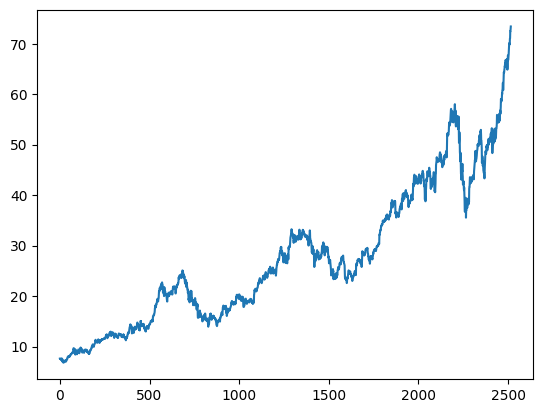

In [8]:
#since close column is our target variable, plot the close column
plt.plot(df.Close)

In [9]:
#splitting the data into training and testing
train_header = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
target_header = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(df.shape)
print(train_header.shape)
print(target_header.shape)

(2516, 5)
(1761, 1)
(755, 1)


In [10]:
#Scaling the stock data
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(train_header)

train_header_array


#print("\n Scaled data: \n ", train_header_array)

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [11]:
#creating the number of steps(x) so as to predict the next result(y)
#the closing price of the particular day would depend on the previous days
x_train = []
y_train = []

for i in range(100, train_header_array.shape[0]):
    x_train.append(train_header_array[i-100: i])
    y_train.append(train_header_array[i, 0]) #because we are considering only one column
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import tensorflow

model = Sequential()
model.add(LSTM(units =50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units =60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))
model.add(LSTM(units =80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mae'])
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 14s 150ms/step - loss: 0.0739 - mae: 0.1987
Epoch 2/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0133 - mae: 0.0859
Epoch 3/50
52/52 [==============================] - 8s 152ms/step - loss: 0.0103 - mae: 0.0747
Epoch 4/50
52/52 [==============================] - 8s 155ms/step - loss: 0.0097 - mae: 0.0728
Epoch 5/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0091 - mae: 0.0700
Epoch 6/50
52/52 [==============================] - 8s 158ms/step - loss: 0.0085 - mae: 0.0681
Epoch 7/50
52/52 [==============================] - 8s 154ms/step - loss: 0.0085 - mae: 0.0677
Epoch 8/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0081 - mae: 0.0663
Epoch 9/50
52/52 [==============================] - 8s 144ms/step - loss: 0.0073 - mae: 0.0630
Epoch 10/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0070 - mae: 0.0621
Epoch 11/50
52/52 [=============================

In [14]:
#save the model
model.save('venv\lstm_model.h5')

In [15]:
#to predict the values for testing data, the previous 100 days is needed
prev_100_days = train_header.tail(100)
final_df = prev_100_days.append(target_header, ignore_index=True)
final_df.head()

C:\Users\dagbo\AppData\Local\Temp\ipykernel_28984\1137634701.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = prev_100_days.append(target_header, ignore_index=True)


,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [16]:
scaled_data = scaler.fit_transform(final_df)
scaled_data
scaled_data.shape

(855, 1)

In [17]:
x_test = []
y_test = []

for i in range(100, scaled_data.shape[0]):
    x_test.append(scaled_data[i-100: i])
    y_test.append(scaled_data[i, 0])
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [18]:
#making predictions
y_pred = model.predict(x_test)
y_pred.shape

24/24 [==============================] - 2s 49ms/step


(755, 1)

Evaluating model performances

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Unscale the predicted values
y_pred_scale = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_scale)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_scale)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_scale)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Median Absolute Error (MAE): 70.37
Mean Absolute Percentage Error (MAPE): 10.36 %
Median Absolute Percentage Error (MDAPE): 5.92 %


In [20]:
print(y_test)
print('----------------predictions--------------')
print(y_pred)


[0.06660719 0.06833931 0.06765694 0.07075375 0.07757719 0.08324586
 0.08387573 0.08723495 0.08461056 0.08350831 0.08854715 0.08849465
 0.08739241 0.08854715 0.08896706 0.08838969 0.09841487 0.09872982
 0.09878228 0.09710267 0.09563301 0.13447409 0.13331935 0.1362062
 0.14255719 0.14906573 0.15174258 0.15373715 0.15216249 0.15830357
 0.16738404 0.1699559  0.16911615 0.17105818 0.17620198 0.178354
 0.17530969 0.17599206 0.17740917 0.17772417 0.19242073 0.1880643
 0.19236827 0.19005879 0.19100361 0.18827421 0.18659456 0.18900904
 0.18932396 0.18822176 0.19593749 0.19714469 0.19347055 0.20118628
 0.19268318 0.20097628 0.19835189 0.19688223 0.19814197 0.21346844
 0.21514801 0.21415073 0.21273361 0.21294353 0.21855977 0.21462318
 0.21273361 0.21105396 0.21016167 0.20207857 0.20297085 0.19903426
 0.20312831 0.19982154 0.19709215 0.20633007 0.20543779 0.21262861
 0.21730003 0.21283853 0.2134159  0.21268107 0.22806007 0.23294141
 0.23057947 0.22779762 0.24055223 0.26180977 0.26695365 0.26312197

In [21]:
scaler.scale_


array([0.02099517])

In [22]:
factorized_scale = 1/0.020995
y_pred = y_pred*factorized_scale
y_test = y_test * factorized_scale

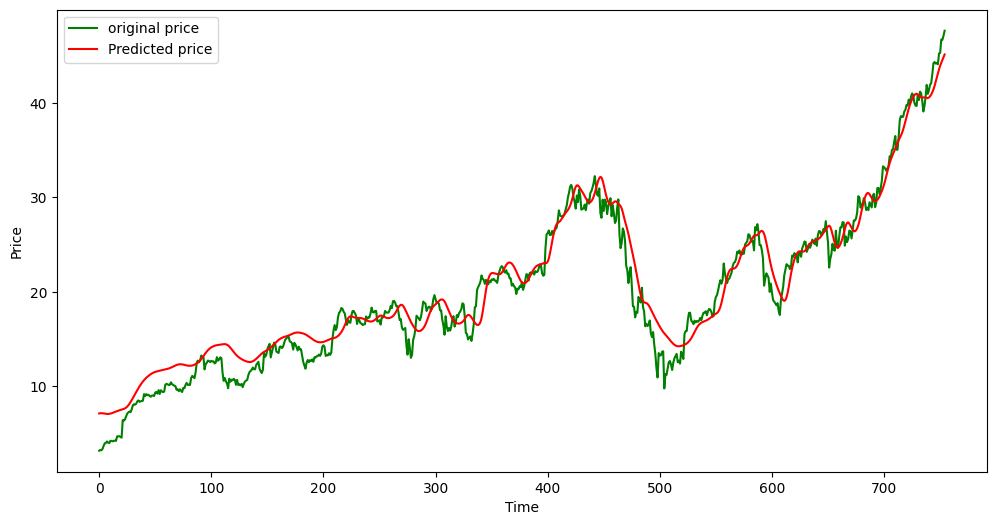

In [23]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label = "original price")
plt.plot(y_pred, 'r', label = "Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()